# PHYS 331 - Numerical Techniques for the Sciences I
## Homework 10: Linear Regression and Least Squares
### Problem 1 -  Fitting a Line and Power-law to Data
---
Name: *Viktorya Hunanyan*

Onyen: *vhunany*

Cell for *Problem 1* is below.

Linear Fit Coefficients: beta_0 = 0.603792035722659, beta_1 = 0.27886961279536976
Best-fit line: y = 0.60 + 0.28x
R^2 value: 0.1417


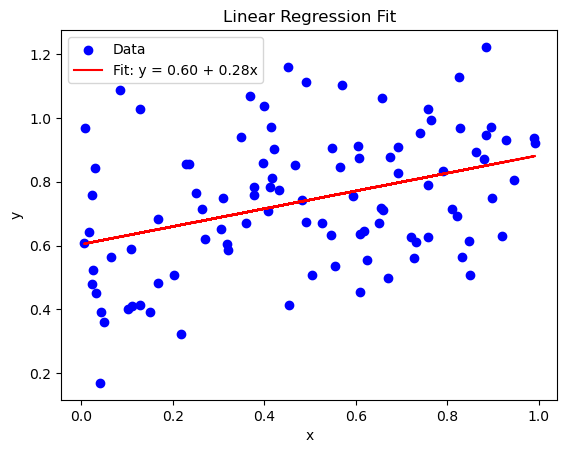

Power-Law Fit Coefficients: beta_0 = 0.7806481426900127, beta_1 = -2.0621008861683605
Power-law fit: y = 0.78x^-2.06
R^2 value: 0.8351


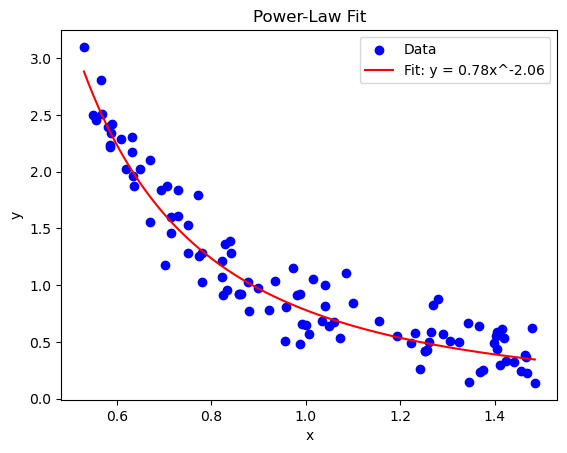

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def load_linear_data():
    x, y = np.loadtxt("linear_data.dat", unpack=True)
    return x, y

def load_powerlaw_data():
    x, y = np.loadtxt("powerlaw_data.dat", unpack=True)
    return x, y

def linear_regression(x_array, y_array):
    """
    Computes the least-squares linear regression.
    
    PARAMETERS:
        x_array: array of x values
        y_array: array of y values
    
    RETURNS:
        beta_0: y-intercept of the best-fit line
        beta_1: slope of the best-fit line
    """
    n = len(x_array)
    x_mean = np.mean(x_array)
    y_mean = np.mean(y_array)
    
    numerator = np.sum((x_array - x_mean) * (y_array - y_mean))
    denominator = np.sum((x_array - x_mean) ** 2)
    beta_1 = numerator / denominator
    beta_0 = y_mean - beta_1 * x_mean
    
    return beta_0, beta_1

def r_squared(x_array, y_array, beta_0, beta_1):
    """
    Computes the R^2 value for the fit.
    
    PARAMETERS:
        x_array: array of x values
        y_array: array of y values
        beta_0: y-intercept of the best-fit line
        beta_1: slope of the best-fit line
    
    RETURNS:
        R^2 statistic
    """
    y_predicted = beta_0 + beta_1 * x_array
    ss_total = np.sum((y_array - np.mean(y_array)) ** 2)
    ss_residual = np.sum((y_array - y_predicted) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

def power_law_fit(x_array, y_array):
    """
    Fits the data to a power-law using linear regression in log-log space.
    
    PARAMETERS:
        x_array: array of x values
        y_array: array of y values
    
    RETURNS:
        beta_0: coefficient of the power-law
        beta_1: exponent of the power-law
        r2: R^2 statistic for the fit
    """
    # Transform data to log-log space
    log_x = np.log(x_array)
    log_y = np.log(y_array)
    
    # Perform linear regression in log-log space
    alpha, beta_1 = linear_regression(log_x, log_y)
    beta_0 = np.exp(alpha)  # Convert alpha back to beta_0
    
    # Calculate R^2 value
    r2 = r_squared(log_x, log_y, alpha, beta_1)
    return beta_0, beta_1, r2

def plot_power_law_fit(x_array, y_array, beta_0, beta_1):
    """
    Plots the scatter plot of power-law data and the best-fit line.
    
    PARAMETERS:
        x_array: array of x values
        y_array: array of y values
        beta_0: coefficient of the power-law
        beta_1: exponent of the power-law
    """
    plt.scatter(x_array, y_array, label="Data", color="blue")
    
    # Generate a smooth curve for the best-fit power-law
    x_fit = np.linspace(min(x_array), max(x_array), 500)  # Smooth range of x values
    y_fit = beta_0 * x_fit ** beta_1  # Compute corresponding y values
    
    plt.plot(x_fit, y_fit, label=f"Fit: y = {beta_0:.2f}x^{beta_1:.2f}", color="red")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Power-Law Fit")
    plt.legend()
    plt.show()

def main():
    # Load linear data
    x_lin, y_lin = load_linear_data()

    # Perform linear regression
    beta_0, beta_1 = linear_regression(x_lin, y_lin)
    
    # Compute R^2 value
    r2_value = r_squared(x_lin, y_lin, beta_0, beta_1)
    
    # Print results
    print(f"Linear Fit Coefficients: beta_0 = {beta_0}, beta_1 = {beta_1}")
    print(f"Best-fit line: y = {beta_0:.2f} + {beta_1:.2f}x")
    print(f"R^2 value: {r2_value:.4f}")
    
    # Plot data and best-fit line
    plot_data_and_fit(x_lin, y_lin, beta_0, beta_1)

    
    # Load power-law data
    x_pl, y_pl = load_powerlaw_data()
    
    # Perform power-law fit
    beta_0, beta_1, r2_value = power_law_fit(x_pl, y_pl)
    
    # Print results
    print(f"Power-Law Fit Coefficients: beta_0 = {beta_0}, beta_1 = {beta_1}")
    print(f"Power-law fit: y = {beta_0:.2f}x^{beta_1:.2f}")
    print(f"R^2 value: {r2_value:.4f}")
    
    # Plot data and best-fit power-law
    plot_power_law_fit(x_pl, y_pl, beta_0, beta_1)

# Run the program
main()
